In [1]:
import pandas as pd #for visualization,modifying,analyzing dataframes
import numpy as np # for dealing with  linear algebra routines,arrays,mathematics
from matplotlib import pyplot as plt #for visualiation
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
#You can dynamically change the default rc (runtime configuration) settings in a python script or interactively from the python shell.
#All rc settings are stored in a dictionary-like variable called 'matplotlib.rcParams'

In [2]:
#read the csv file
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
type(df1)

pandas.core.frame.DataFrame

In [4]:
df1.shape #13320 rows,9 columns

(13320, 9)

In [5]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
#group the dataframe on basis of 'area type'
df1.groupby(by='area_type').agg('count')

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


In [7]:
 df1.groupby(by='area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
df1.groupby(by='area_type')['availability'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: availability, dtype: int64

In [9]:
df1.groupby(by='area_type')['society'].agg('count')

area_type
Built-up  Area          1215
Carpet  Area              54
Plot  Area               311
Super built-up  Area    6238
Name: society, dtype: int64

In [10]:
#dropping availability ,society,area_type,balcony as they are not useful
df2 = df1.drop(labels=['area_type','society','balcony','availability'],axis=1)
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


# Handling NA Values

In [11]:
#handling the null values
df2.isnull().sum()
#so this tells us that we have 1 row where 'location' has null value
#we have 16 row where 'size' has null value
#we have 73 row where 'bath' has null value

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
#dropping the rows with null values as the size of the dataset is very large
df3 = df2.dropna()
df3.isnull().sum() #now no columns having rows with null values

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
#exploring the 'size' column
df3['size'].unique()
#4bedroom and 4 BHK are same

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

# Feature Engineering

In [14]:
#new column 'bhk'
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\nishc\AppData\Local\Temp/ipykernel_1292/914398866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [15]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
df3[df3.bhk>20]
#notice there is an error that total_sqrt=2400 and bhk=43 which is not possible

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [18]:
df3.info()
#notice the columns with 'object' dtype -> need to make it to integer or float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 724.4+ KB


In [19]:
df3.total_sqft.unique()
#we see here that (1133 - 1348) which is a range,but we need a single value

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
#we try to make the values of total_sqrt column from 'string' to 'float'
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
df3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [22]:
#doing this will return the dataframe where the rows are float
#df3[df3['total_sqft'].apply(func=is_float)]

#but we want to see the rows where the values are not float(use '~')
df3[~df3['total_sqft'].apply(func=is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [23]:
#we write a function that takes the range values(total_sqrt column) and return a average value

def convert_sqrt_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        #besides of range values , there are string values also like '34.56Sq.Meter' 
        #so we ignore all of them for now
        return None

In [24]:
#testing the function
convert_sqrt_to_num('2166')

2166.0

In [25]:
#testing the function
convert_sqrt_to_num('850 - 1060')

955.0

In [26]:
#testing the function
convert_sqrt_to_num('34,563Sq. Meter')

In [27]:
#apply this function on 'total_sqrt' column
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqrt_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [28]:
#checking if it worked
#in df3 , row 30 -> 2100 - 2850(total_sqft)

#in df4 ,row 30
df4.loc[30] #(2100+2850)/2 = 2475.0

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [29]:
df5 = df4.copy()

In [30]:
#making a new feature(column) - price per square feet(price is in lakhs)
df5['price_per_sqrt'] = df5['price'] * 100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [31]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [32]:
len(df5.location.unique()) # we have too many locations
#if we try to convert the column into numbers then we'll have around 1304 columns 
#this is called dimensionality curse(high dimensionality)

1298

In [33]:
#there will be some locations which will have 1 - 3 data points , so find it
df5.location = df5.location.apply(lambda x: x.strip()) #remove spaces from location

#group by object 'location_stats'
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

#we can see the location with all data points and we sorted them on data points 

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [34]:
location_stats.values.sum()

13200

In [35]:
#as there are many locations with 1 data points so we can set a threshold that
#any location with less than 10 data points are 'other location'

#checking how many location are there with less than or equal to 10 data points
len(location_stats[location_stats <= 10])

1047

In [36]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [37]:
#how many unique locations
len(df5.location.unique())

1287

In [38]:
#making a general cateogory 'other' for locations having less than or equal to 10 data points
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [39]:
#if we again check the unique locations then it is reduced to 242 .
len(df5.location.unique())

241

In [40]:
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


# Outlier detection

In [41]:
600/6 #600 square feet you are having with 6 bedrooms
#now this means per squre feet 1 bed room which is unusual

100.0

In [42]:
df5[df5.total_sqft/df5.bhk < 300]
#now the dataset below contains outliers (like 1020(total_sqft) and 6 bhk )
#1020/6 = 170 which is not possible

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [43]:
df5.shape

(13200, 7)

In [44]:
#the rows without outliers 
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [45]:
df6.shape

(12456, 7)

In [46]:
df6.price_per_sqrt.describe()
#min and max is unusual

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqrt, dtype: float64

In [47]:
#we have to find per loaction mean and standard deviation
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqrt)
        st = np.std(subdf.price_per_sqrt)
        reduced_df = subdf[(subdf.price_per_sqrt>(m-st)) & (subdf.price_per_sqrt<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [48]:
df7 = remove_pps_outliers(df6)
df7.shape

(10242, 7)

In [49]:
#now if we see more then 3BHK(1210 total sqft) has price 81 lakhs
#while for 2BHK(1268 total_sqft) has price of 127 lakhs . 
#Doing visualization for finding more abour it

#for a same location there are 2bhk and 3 bhk rooms
def plot_scatter_chart(df,location):
    
    #take all those rows where the passed loacation matches the location in the dataframe and it is 2 bhk
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    print(bhk2)
    
    #take all those rows where the passed loacation matches the location in the dataframe and it is 3 bhk
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    print(bhk3)
    
    plt.scatter(x=bhk2.total_sqft,y=bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(x=bhk3.total_sqft,y=bhk3.price,color='green',label='3 BHK',s=50,marker='+')
    
    plt.xlabel('Total square feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    matplotlib.rcParams['figure.figsize'] = (15,10)

          location       size  total_sqft  bath  price  bhk  price_per_sqrt
5737  Rajaji Nagar      2 BHK      1370.0   2.0  170.0    2    12408.759124
5740  Rajaji Nagar      2 BHK      1718.0   3.0  288.0    2    16763.678696
5743  Rajaji Nagar  2 Bedroom      1200.0   2.0  150.0    2    12500.000000
5744  Rajaji Nagar  2 Bedroom      1160.0   1.0  163.0    2    14051.724138
5746  Rajaji Nagar      2 BHK      1440.0   2.0  170.0    2    11805.555556
5748  Rajaji Nagar      2 BHK      1440.0   2.0  185.0    2    12847.222222
5755  Rajaji Nagar      2 BHK      1357.0   2.0  130.0    2     9579.955785
5762  Rajaji Nagar      2 BHK      1763.0   3.0  262.0    2    14861.032331
5769  Rajaji Nagar      2 BHK      1268.0   2.0  127.0    2    10015.772871
5772  Rajaji Nagar  2 Bedroom      1200.0   1.0  200.0    2    16666.666667
5788  Rajaji Nagar      2 BHK      1718.0   3.0  275.0    2    16006.984866
5789  Rajaji Nagar      2 BHK      1763.0   3.0  240.0    2    13613.159387
5792  Rajaji

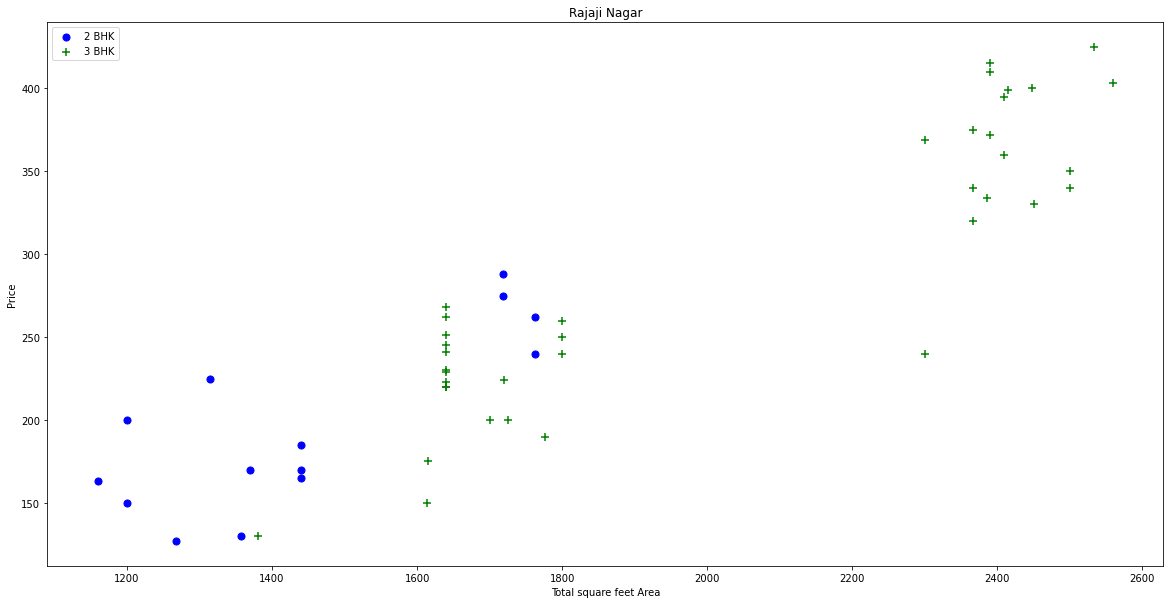

In [50]:
plot_scatter_chart(df7,'Rajaji Nagar')
#we see that around 1750 total sqft area , the 2 bedrooms are higher than 3 bedroom apartments
#this is outliers that we need to remove

     location   size  total_sqft  bath   price  bhk  price_per_sqrt
2796   Hebbal  2 BHK    1349.000   2.0   98.20    2     7279.466271
2801   Hebbal  2 BHK    1337.000   2.0   82.00    2     6133.133882
2802   Hebbal  2 BHK    1349.000   2.0   98.00    2     7264.640474
2806   Hebbal  2 BHK     687.325   2.0   42.72    2     6215.400284
2810   Hebbal  2 BHK    1080.000   2.0   54.00    2     5000.000000
2811   Hebbal  2 BHK     812.000   2.0   55.00    2     6773.399015
2813   Hebbal  2 BHK    1075.000   2.0   52.00    2     4837.209302
2818   Hebbal  2 BHK     823.000   2.0   50.63    2     6151.883354
2819   Hebbal  2 BHK    1420.000   2.0  123.00    2     8661.971831
2821   Hebbal  2 BHK    1420.000   2.0   99.39    2     6999.295775
2826   Hebbal  2 BHK    1420.000   2.0   99.39    2     6999.295775
2828   Hebbal  2 BHK    1440.000   2.0  115.00    2     7986.111111
2829   Hebbal  2 BHK    1100.000   2.0   54.00    2     4909.090909
2833   Hebbal  2 BHK    1420.000   2.0  107.00  

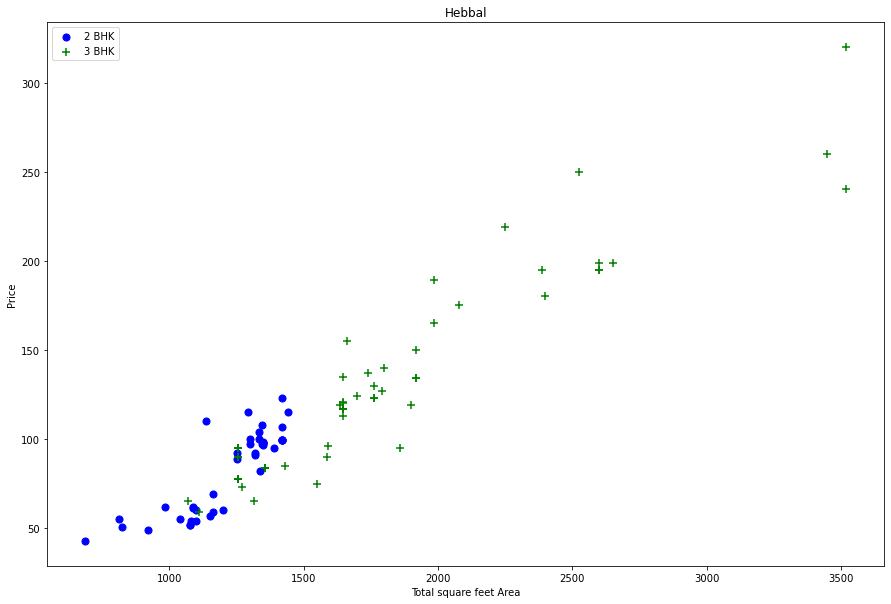

In [51]:
#on different location
plot_scatter_chart(df7,'Hebbal')
#we see that around 1400 sqft area there are some 2bhk rooms(blue) which have higher 
#price than 3bhk (green)

In [52]:
#to rove those points we will build a dictionary of stats per bhk ie.
'''
{
    '1':{
        'mean':4000,
        'std': 2000,
        'count':34
    },
    '2':{
        'mean':4300,
        'std':2300,
        'count':22
    },
}

Now we can remove those 2 BHK apartments whose price_per_sqft is less than price_per_sqft of 1 BHK apartment
'''
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqrt),
                'std': np.std(bhk_df.price_per_sqrt),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqrt<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [53]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7317, 7)

     location   size  total_sqft  bath   price  bhk  price_per_sqrt
2796   Hebbal  2 BHK    1349.000   2.0   98.20    2     7279.466271
2801   Hebbal  2 BHK    1337.000   2.0   82.00    2     6133.133882
2802   Hebbal  2 BHK    1349.000   2.0   98.00    2     7264.640474
2806   Hebbal  2 BHK     687.325   2.0   42.72    2     6215.400284
2810   Hebbal  2 BHK    1080.000   2.0   54.00    2     5000.000000
2811   Hebbal  2 BHK     812.000   2.0   55.00    2     6773.399015
2813   Hebbal  2 BHK    1075.000   2.0   52.00    2     4837.209302
2818   Hebbal  2 BHK     823.000   2.0   50.63    2     6151.883354
2819   Hebbal  2 BHK    1420.000   2.0  123.00    2     8661.971831
2821   Hebbal  2 BHK    1420.000   2.0   99.39    2     6999.295775
2826   Hebbal  2 BHK    1420.000   2.0   99.39    2     6999.295775
2828   Hebbal  2 BHK    1440.000   2.0  115.00    2     7986.111111
2829   Hebbal  2 BHK    1100.000   2.0   54.00    2     4909.090909
2833   Hebbal  2 BHK    1420.000   2.0  107.00  

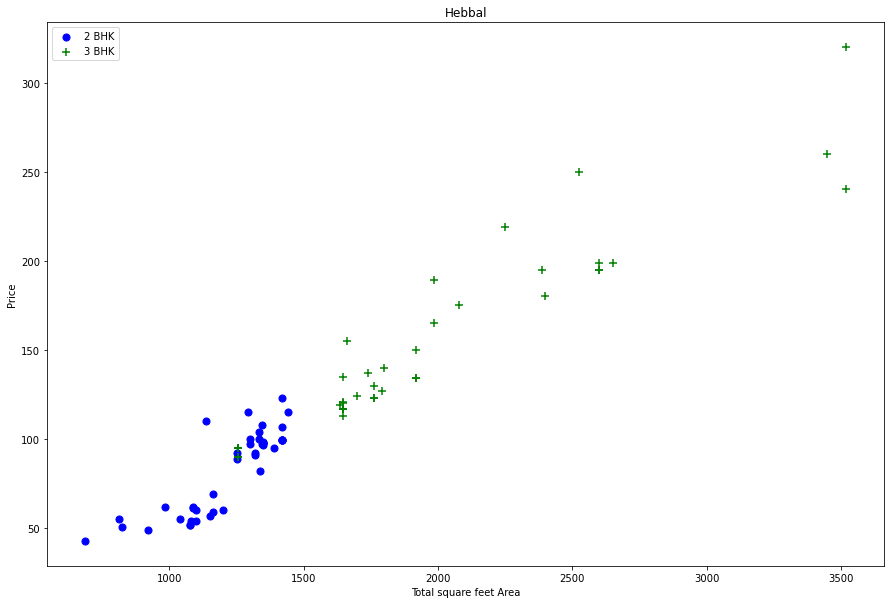

In [54]:
plot_scatter_chart(df8,'Hebbal')

Text(0, 0.5, 'Count')

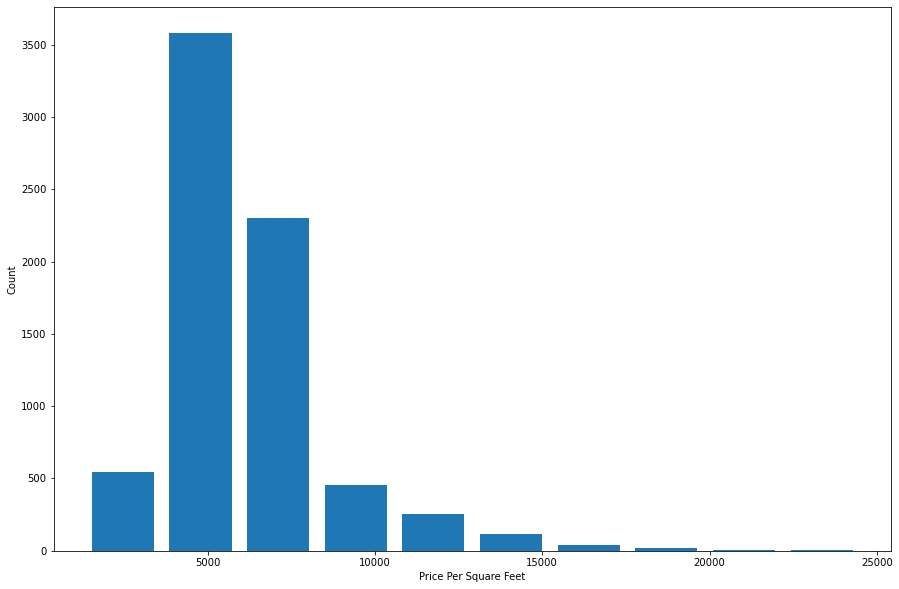

In [55]:
#plot a histogram 
plt.hist(x=df8.price_per_sqrt,rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

#we see that 0 - 10k price/sqft we have majority of data points

In [56]:
#explore the bathroom feature
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [57]:
#places which have more than 10 bathrooms
df8[df8.bath>10]
#its okay because the total_sqft is also very big
#it will be unusual when no of bathroom > no.of bedroom+2

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

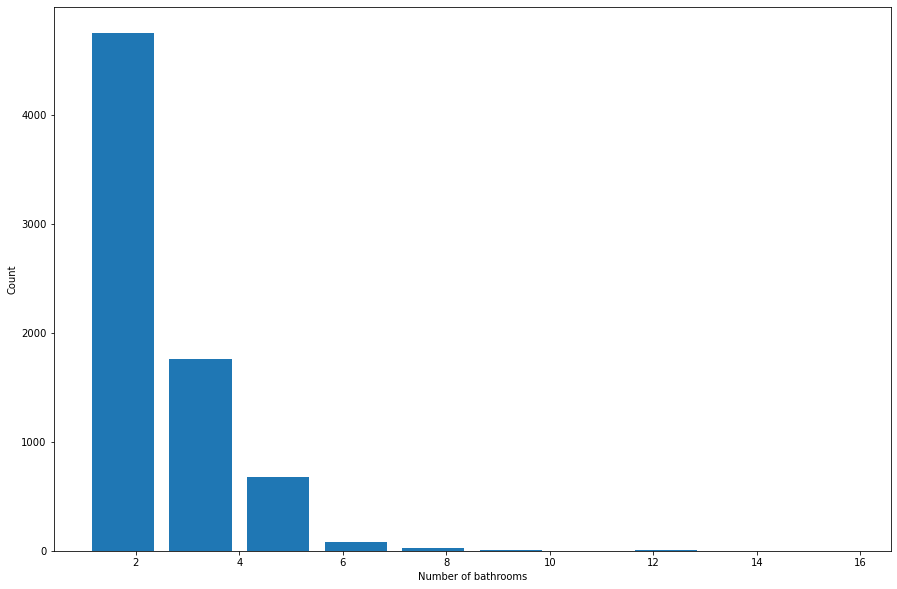

In [58]:
plt.hist(x=df8.bath,rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [59]:
#it will be unusual when no of bathroom > no.of bedroom+2
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [60]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape
#we have all those rows where the no of bathrooms < no of bedrooms+2

(7239, 7)

In [61]:
df10 = df9.drop(['size','price_per_sqrt'],axis='columns')
df10.shape

(7239, 5)

In [62]:
df10.head(30)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.00,4
1,1st Block Jayanagar,1630.0,3.0,194.00,3
2,1st Block Jayanagar,1875.0,2.0,235.00,3
3,1st Block Jayanagar,1200.0,2.0,130.00,3
4,1st Block Jayanagar,1235.0,2.0,148.00,2
5,1st Block Jayanagar,2750.0,4.0,413.00,4
6,1st Block Jayanagar,2450.0,4.0,368.00,4
8,1st Phase JP Nagar,1875.0,3.0,167.00,3
9,1st Phase JP Nagar,1500.0,5.0,85.00,5
10,1st Phase JP Nagar,2065.0,4.0,210.00,3


# One Hot Encoding

In [63]:
#Converting the 'location' column into number
dummies = pd.get_dummies(data=df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
#append this to new dataframe
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
#drop'location'
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df12.shape

(7239, 244)

# Build a model now

In [67]:
#input features
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
#target variable
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [69]:
#dividing into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [70]:
#fit the model
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8629132245229443

In [71]:
#Trying a couple of models to know which one is better

## K- Fold Model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [72]:
#cross_val_score(estimator=LinearRegression(),X=X,y=y,cv=cv)

In [73]:
#Grid Search CV - GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters.
#It is basically a cross-validation method.

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.847796,{'normalize': False}
1,lasso,0.726779,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.714271,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [74]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [75]:
# it gives the column index 5
np.where(X.columns == '2nd Phase Judicial Layout')[0][0]

5

# Predicting the price

In [76]:
#this will return the estimated price
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [77]:
np.zeros(4).shape

(4,)

In [78]:
predict_price('1st Phase JP Nagar',1000,2,2)

83.86570258312184

In [79]:
predict_price('1st Phase JP Nagar',1000,3,3)

86.08062284986954

In [80]:
predict_price('Indira Nagar',1000,2,2)

193.31197733179866

In [81]:
predict_price('Indira Nagar',1000,3,3)

195.52689759854636

In [82]:
#more bhk(3) and less bath(2)
predict_price('Indira Nagar',1000,2,3)

191.80995089177839

In [83]:
predict_price('1st Phase JP Nagar',1000,2,3)

82.36367614310157

# Export the model

In [84]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [85]:
#we also need the column information like the way/sequence there are arranged in the dataframe
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))